In [94]:
%pip install -qqq keras tensorflow numpy matplotlib pandas seaborn scikit-learn plotly nbformat

Note: you may need to restart the kernel to use updated packages.


In [95]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip -O ../data/iris/iris.zip

--2024-05-11 11:28:40--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘../data/iris/iris.zip’

../data/iris/iris.z     [ <=>                ]   3,65K  --.-KB/s    in 0s      

2024-05-11 11:28:41 (255 MB/s) - ‘../data/iris/iris.zip’ saved [3738]



In [96]:
!unzip ../data/iris/iris.zip -d ../data/iris

Archive:  ../data/iris/iris.zip
  inflating: ../data/iris/Index      
  inflating: ../data/iris/bezdekIris.data  
  inflating: ../data/iris/iris.data  
  inflating: ../data/iris/iris.names  


In [97]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
iris = pd.read_csv("../data/iris/iris.data", names=column_names)

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

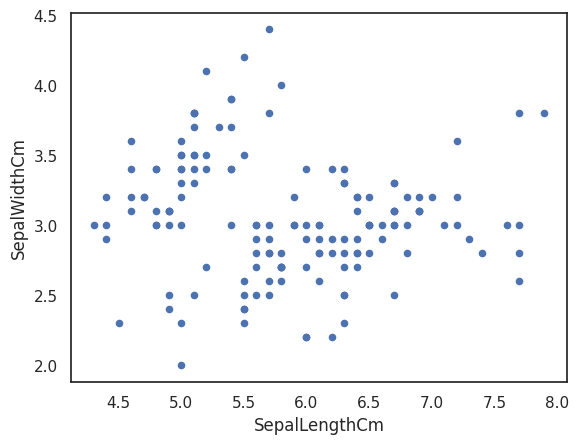

In [99]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

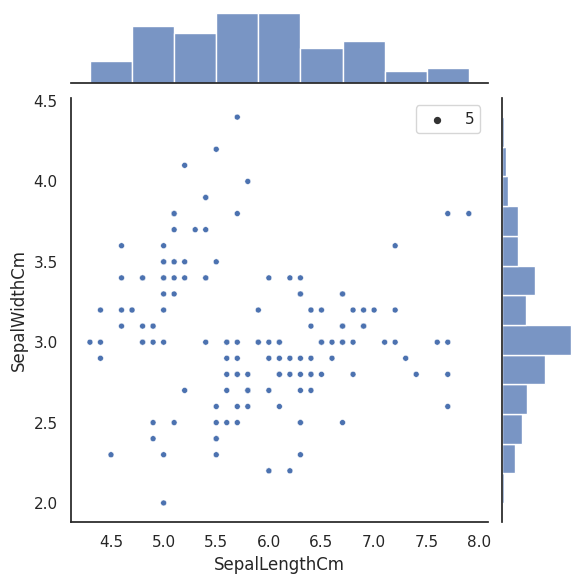

In [100]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

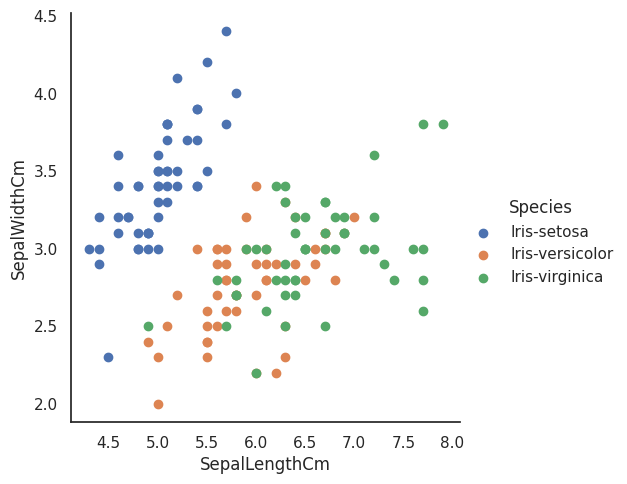

In [101]:
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

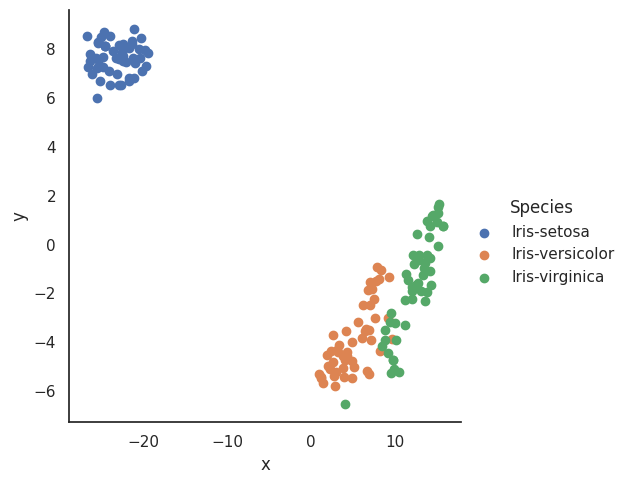

In [102]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(iris.iloc[:, :-1])

iris_2d = pd.DataFrame(X_2d, columns=["x", "y"])
iris_2d["Species"] = iris["Species"]

sns.FacetGrid(iris_2d, hue="Species", height=5) \
   .map(plt.scatter, "x", "y") \
   .add_legend()

In [103]:
import plotly.graph_objects as go

tsne = TSNE(n_components=3, random_state=0)
X_3d = tsne.fit_transform(iris.iloc[:, :-1])

iris_3d = pd.DataFrame(X_3d, columns=["x", "y", "z"])
iris_3d["Species"] = iris["Species"]
iris_3d.head()


,x,y,z,Species
0,-33.395405,7.221526,0.853016,Iris-setosa
1,-52.762405,55.533375,-10.840293,Iris-setosa
2,-39.251293,36.955811,-27.752916,Iris-setosa
3,-18.137939,59.468166,-14.877167,Iris-setosa
4,-46.337383,-5.028359,-8.661345,Iris-setosa


In [104]:
# Convert categorical labels to numerical values
iris_3d['label_numeric'] = pd.factorize(iris_3d['Species'])[0]

In [105]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=iris_3d['x'],
    y=iris_3d['y'],
    z=iris_3d['z'],
    mode='markers',
    marker=dict(
        color=iris_3d['label_numeric'],
        size=2,
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.show()

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import sqlite3

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

import tensorflow as tf
import keras

In [107]:
Y = iris['Species']
X = iris.drop(['Species'], axis=1)
print("Shape of Input  features: {}".format(X.shape))
print("Shape of Output features: {}".format(Y.shape))

Shape of Input  features: (150, 4)
Shape of Output features: (150,)


In [108]:
lbl_clf = LabelEncoder()
Y_encoded = lbl_clf.fit_transform(Y)

#Keras requires your output feature to be one-hot encoded values.
Y_final = keras.utils.to_categorical(Y_encoded)

print("Therefore, our final shape of output feature will be {}".format(Y_final.shape))

Therefore, our final shape of output feature will be (150, 3)


In [109]:
seed = 42
np.random.seed(seed)

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_final, test_size=0.25, random_state=seed, stratify=Y_encoded, shuffle=True)

print("Training Input shape\t: {}".format(x_train.shape))
print("Testing Input shape\t: {}".format(x_test.shape))
print("Training Output shape\t: {}".format(y_train.shape))
print("Testing Output shape\t: {}".format(y_test.shape))

Training Input shape	: (112, 4)
Testing Input shape	: (38, 4)
Training Output shape	: (112, 3)
Testing Output shape	: (38, 3)


In [111]:
std_clf = StandardScaler()
# x_train_new = std_clf.fit_transform(x_train)
# x_test_new = std_clf.transform(x_test)

x_train_new = x_train
x_test_new = x_test

In [112]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(keras.layers.Dense(10, activation=keras.activations.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(7, activation=keras.activations.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(5, activation=keras.activations.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(keras.layers.Dense(3, activation=keras.activations.softmax))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

iris_model = model.fit(x_train_new, y_train, epochs=700, batch_size=7)

Epoch 1/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1430 - loss: 1.9895    
Epoch 2/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1583 - loss: 1.7708     
Epoch 3/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.1336 - loss: 1.8040   
Epoch 4/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.2559 - loss: 1.5949
Epoch 5/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2963 - loss: 1.5383 
Epoch 6/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.3929 - loss: 1.4672
Epoch 7/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.4691 - loss: 1.3980
Epoch 8/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3661 - loss: 1.5136 
Epoch 9/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3998 - loss: 1.3394
Epoch 10/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3685 - loss: 1.3714
Epoch 11/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4675 - loss: 1.2531 
Epoch 12/700
16/16 ━━━━━━━━━━━━━━━━━━━━ 

In [113]:
model.evaluate(x_test_new, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9161 - loss: 0.2371  


[0.22724081575870514, 0.9210526347160339]

In [114]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693 (2.71 KB)

 Trainable params: 219 (876.00 B)

 Non-trainable params: 34 (136.00 B)

 Optimizer params: 440 (1.72 KB)

In [115]:
model.save("../data/iris/iris_model.keras")

In [116]:
model2 = keras.models.load_model("../data/iris/iris_model.keras")
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693 (2.71 KB)

 Trainable params: 219 (876.00 B)

 Non-trainable params: 34 (136.00 B)

 Optimizer params: 440 (1.72 KB)

In [117]:
x_test_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
42,4.4,3.2,1.3,0.2
56,6.3,3.3,4.7,1.6
99,5.7,2.8,4.1,1.3
53,5.5,2.3,4.0,1.3
38,4.4,3.0,1.3,0.2
85,6.0,3.4,4.5,1.6
134,6.1,2.6,5.6,1.4
141,6.9,3.1,5.1,2.3
107,7.3,2.9,6.3,1.8
132,6.4,2.8,5.6,2.2


In [118]:
result = model2(np.array([[4.4, 3.2, 1.3, 0.2]]))

In [119]:
max_index = np.argmax(result)
print("Predicted Class: {}".format(lbl_clf.inverse_transform([max_index])[0]))

Predicted Class: Iris-setosa


In [120]:
iris.iloc[42]

SepalLengthCm            4.4
SepalWidthCm             3.2
PetalLengthCm            1.3
PetalWidthCm             0.2
Species          Iris-setosa
Name: 42, dtype: object

In [124]:
classes = {i: lbl_clf.classes_[i] for i in range(len(lbl_clf.classes_))}
classes

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}